# Advanced Regression using Ridge and Lasso
## Assignment is divided into following parts:
- Data Understanding
- EDA and Data Cleaning
- Dummy Variables Encoding
- Splitting the Data into Training and Testing Sets
- Building our Model powered by Linear, Ridge and Lasso Regression
- Feature Elimination using Lasso
- Recursive Feature Elimination (RFE)
- Residual Analysis on train data
- Looking for patterns in the residuals
- Model Evaluation
- Conclusion
- Assignment Part 2 - Subjective Questions Calculation and Analysis

# Submitted by:
# Shubhanshu Kumar Singh
# IIITB Roll No : EML21100082
# Applicant ID : APFE21709564

## Importing Libraries

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing


import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# to display all coulmns of a dataframe
pd.set_option('display.max_column', None)

# to display all rows of a dataframe
pd.set_option('display.max_rows', None)

# to display all items of a long sequence
pd.set_option('display.max_seq_items', None)

# to display complete contents inside a cell in dataframe
pd.set_option('display.max_colwidth', None)

pd.set_option('expand_frame_repr', True)

## Data Understanding and Exploration
### Let's first have a look at the dataset and understand the size, attribute names etc.

In [3]:
# reading the dataset
house_df = pd.read_csv("datasets/train.csv")

In [4]:
# head
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
house_df.shape # contains 1460 rows and 81 columns

(1460, 81)

In [6]:
# summary of the dataset: 1460 rows, 81 columns
house_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## According to data dictionary, NA is one of the category for several categorical variables.
## Therefore to avoid confusion with actual NA/missing values, we are explicitly mapping it to the respective category for better inference.

In [7]:
house_df[['Alley']] = house_df[['Alley']].fillna(value="No Alley Access")
house_df[['BsmtQual']] = house_df[['BsmtQual']].fillna(value="No Basement")
house_df[['BsmtCond']] = house_df[['BsmtCond']].fillna(value="No Basement")
house_df[['BsmtExposure']] = house_df[['BsmtExposure']].fillna(value="No Basement")
house_df[['BsmtFinType1']] = house_df[['BsmtFinType1']].fillna(value="No Basement")
house_df[['BsmtFinType2']] = house_df[['BsmtFinType2']].fillna(value="No Basement")
house_df[['FireplaceQu']] = house_df[['FireplaceQu']].fillna(value="No Fireplace")
house_df[['GarageType']] = house_df[['GarageType']].fillna(value="No Garage")
house_df[['GarageFinish']] = house_df[['GarageFinish']].fillna(value="No Garage")
house_df[['GarageQual']] = house_df[['GarageQual']].fillna(value="No Garage")
house_df[['GarageCond']] = house_df[['GarageCond']].fillna(value="No Garage")
house_df[['PoolQC']] = house_df[['PoolQC']].fillna(value="No Pool")
house_df[['Fence']] = house_df[['Fence']].fillna(value="No Fence")
house_df[['MiscFeature']] = house_df[['MiscFeature']].fillna(value="No MiscFeature")
house_df[['MasVnrType']] = house_df[['MasVnrType']].fillna(value="No MasVnrType")

# Custom Map Functions

In [8]:
# Defining the OverallQual and OverallCond map function
def mapping_func(x):
    return x.map({10:"Very Excellent",
                  9:"Excellent",
                  8:"Very Good",
                  7:"Good",
                  6:"Above Average",
                  5:"Average",
                  4:"Below Average",
                  3:"Fair",
                  2:"Poor",
                  1:"Very Poor"})

# Applying the function to the OverallQual column
house_df[["OverallQual"]] = house_df[["OverallQual"]].apply(mapping_func)

# Applying the function to the OverallCond column
house_df[["OverallCond"]] = house_df[["OverallCond"]].apply(mapping_func)

# Data Cleaning
## Counting the NaN values across all columns in the dataframe

In [9]:
house_df.isna().sum(axis = 0)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [10]:
house_df.dropna(axis=1, how='all',inplace=True)

In [11]:
house_df.shape

(1460, 81)

In [12]:
house_df.isna().mean(axis = 0).round(4)*100

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley             0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.00
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          0.00
BsmtCond          0.00
BsmtExposure      0.00
BsmtFinType1      0.00
BsmtFinSF1        0.00
BsmtFinType2      0.00
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

# Observations from above code:
### 1. Some columns contain NaN values.
### 2. We should not drop these columns as NaN % is not very high.
### 3. It's better to impute these columns with mean/median for numeric and mode for categorical variable.
### 4. GarageYrBlt is special case. We will derive another feature out of it.

Text(0.5, 1.0, 'Distribution of LotFrontage')

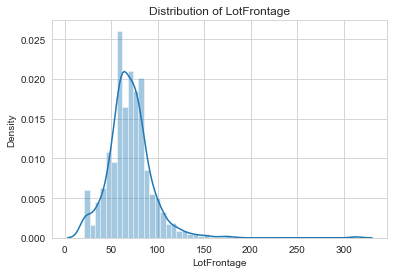

In [13]:
#distribution plot- histogram
sns.set_style('whitegrid')
sns.distplot(house_df['LotFrontage']).set_title("Distribution of LotFrontage")

In [14]:
house_df[["LotFrontage"]].describe()

,LotFrontage
count,1201.000000
mean,70.049958
std,24.284752
min,21.000000
25%,59.000000
50%,69.000000
75%,80.000000
max,313.000000


## From above code and plot we can see that both mean and median are close enough
## We can impute with any of them.

In [15]:
house_df[["LotFrontage"]] = house_df[["LotFrontage"]].fillna(value=house_df["LotFrontage"].mean())

Text(0.5, 1.0, 'Distribution of MasVnrArea')

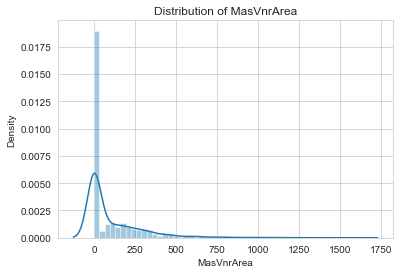

In [16]:
#distribution plot- histogram
sns.distplot(house_df['MasVnrArea']).set_title("Distribution of MasVnrArea")

In [17]:
house_df[["MasVnrArea"]].describe()

,MasVnrArea
count,1452.000000
mean,103.685262
std,181.066207
min,0.000000
25%,0.000000
50%,0.000000
75%,166.000000
max,1600.000000


## From above plot we can see that data is skewed.
## We should impute with median.

In [18]:
house_df[["MasVnrArea"]] = house_df[["MasVnrArea"]].fillna(value=house_df["MasVnrArea"].median())

In [19]:
house_df.groupby(['Electrical'], dropna=False, as_index=False).size()

,Electrical,size
0,FuseA,94
1,FuseF,27
2,FuseP,3
3,Mix,1
4,SBrkr,1334
5,NaN,1


## From above code we can see only one missing value.
## We can impute it with mode.

In [20]:
house_df[["Electrical"]] = house_df[["Electrical"]].fillna(value=house_df['Electrical'].mode().get(key=0))

## Deriving new features from variables containing years

In [21]:
house_df['YearBuilt_Age'] = house_df.YearBuilt.max()-house_df.YearBuilt
house_df['YearRemodAdd_Age'] = house_df.YearRemodAdd.max()-house_df.YearRemodAdd
house_df['GarageYrBlt_Age'] = house_df.GarageYrBlt.max()-house_df.GarageYrBlt
house_df['YrSold_Age'] = house_df.YrSold.max()-house_df.YrSold

In [22]:
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,YearBuilt_Age,YearRemodAdd_Age,GarageYrBlt_Age,YrSold_Age
0,1,60,RL,65.0,8450,Pave,No Alley Access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No Pool,No Fence,No MiscFeature,0,2,2008,WD,Normal,208500,7,7,7.0,2
1,2,20,RL,80.0,9600,Pave,No Alley Access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Above Average,Very Good,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No Pool,No Fence,No MiscFeature,0,5,2007,WD,Normal,181500,34,34,34.0,3
2,3,60,RL,68.0,11250,Pave,No Alley Access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No Pool,No Fence,No MiscFeature,0,9,2008,WD,Normal,223500,9,8,9.0,2
3,4,70,RL,60.0,9550,Pave,No Alley Access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Good,Average,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No Pool,No Fence,No MiscFeature,0,2,2006,WD,Abnorml,140000,95,40,12.0,4
4,5,60,RL,84.0,14260,Pave,No Alley Access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Very Good,Average,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No Pool,No Fence,No MiscFeature,0,12,2008,WD,Normal,250000,10,10,10.0,2


In [23]:
house_df[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuilt_Age','YearRemodAdd_Age',
             'GarageYrBlt_Age','YrSold_Age']].sample(10)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,YearBuilt_Age,YearRemodAdd_Age,GarageYrBlt_Age,YrSold_Age
383,1928,1950,1950.0,2009,82,60,60.0,1
1305,2006,2007,2006.0,2009,4,3,4.0,1
202,1924,1950,1924.0,2006,86,60,86.0,4
475,1963,1963,1996.0,2007,47,47,14.0,3
355,1995,1995,1995.0,2007,15,15,15.0,3
954,1975,1975,NaN,2006,35,35,NaN,4
528,1920,2002,NaN,2007,90,8,NaN,3
555,1922,1950,1922.0,2006,88,60,88.0,4
1072,1948,1950,1954.0,2006,62,60,56.0,4
868,1948,1950,1979.0,2006,62,60,31.0,4


## dropping these variables

In [24]:
house_df = house_df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns')

## imputing missing GarageYrBlt_Age with -1

In [25]:
house_df[["GarageYrBlt_Age"]] = house_df[["GarageYrBlt_Age"]].fillna(value = -1)

## Drop Id column

In [26]:
house_df = house_df.drop('Id',axis='columns')

In [27]:
house_df.shape

(1460, 80)

In [28]:
house_df.describe()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearBuilt_Age,YearRemodAdd_Age,GarageYrBlt_Age,YrSold_Age
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,180921.195890,38.732192,25.134247,29.691096,2.184247
std,42.300571,22.024023,9981.264932,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,79442.502883,30.202904,20.645407,25.121824,1.328095
min,20.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,0.000000,0.000000,-1.000000,0.000000
25%,20.000000,60.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,129975.000000,10.000000,6.000000,7.000000,1.000000
50%,50.000000,70.049958,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,163000.000000,37.000000,16.000000,25.500000,2.000000
75%,70.000000,79.000000,11601.500000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,214000.000000,56.000000,43.000000,48.000000,3.000000
max,190.000000,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,755000.000000,138.000000,60.000000,110.000000,4.000000


## Correlation Analysis using Heatmap

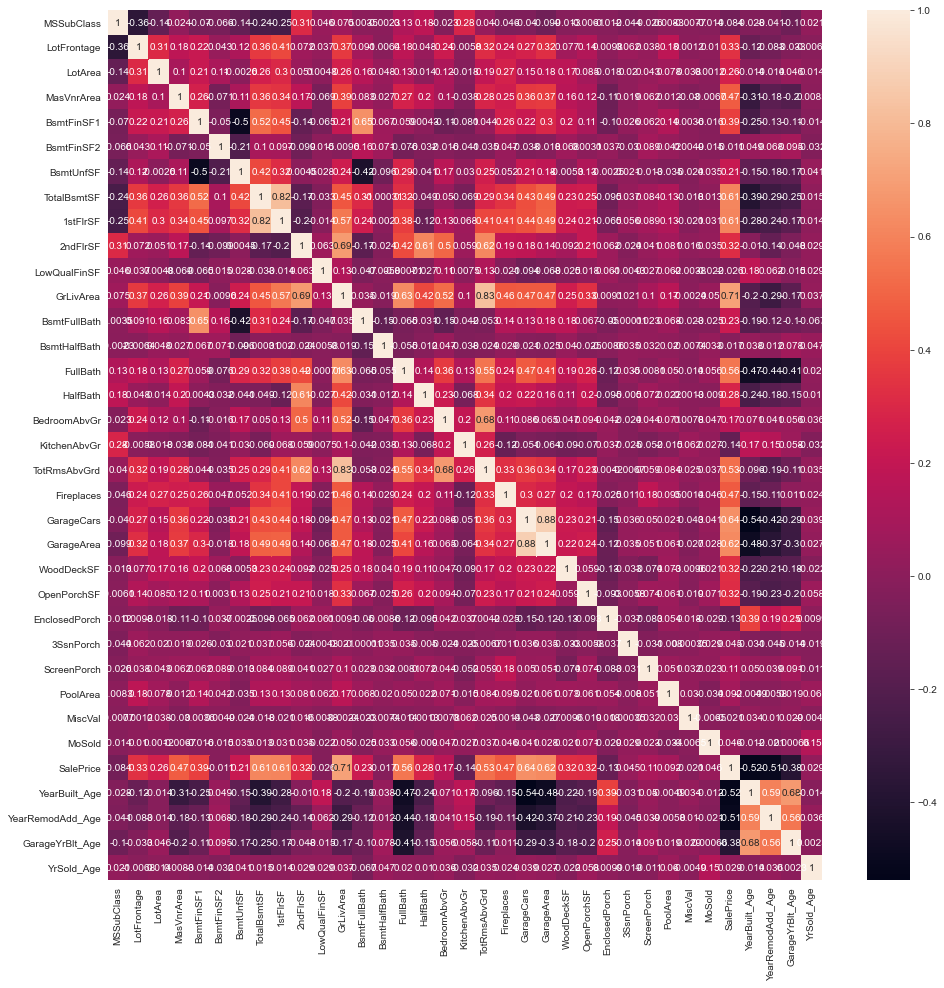

In [29]:
plt.figure(figsize=(16,16))
sns.heatmap(house_df.corr(),annot=True)
plt.show()

## Box Plot Analysis

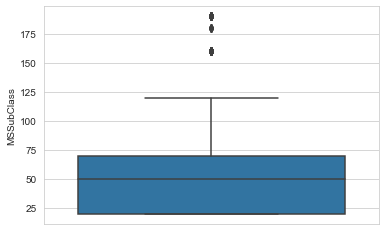

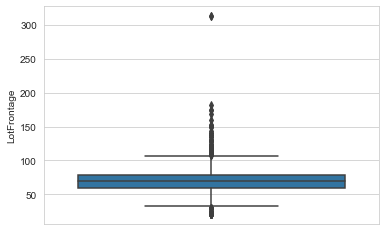

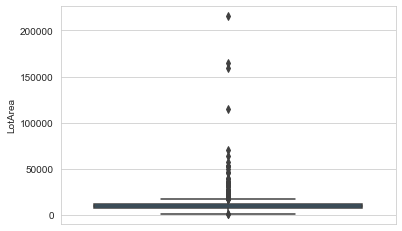

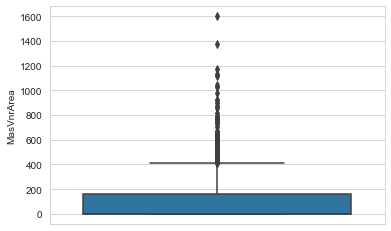

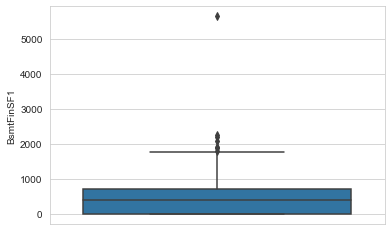

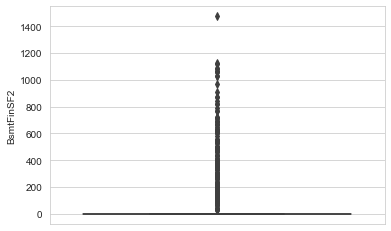

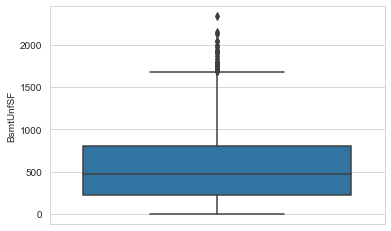

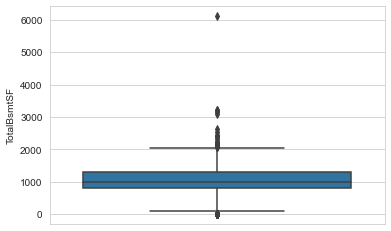

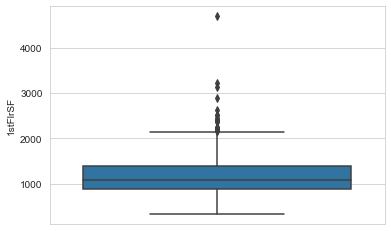

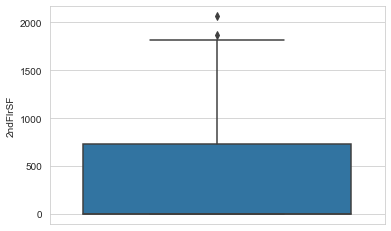

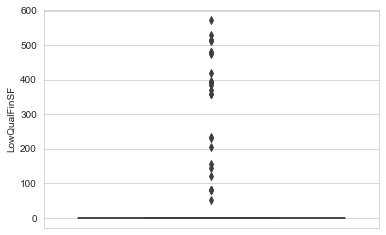

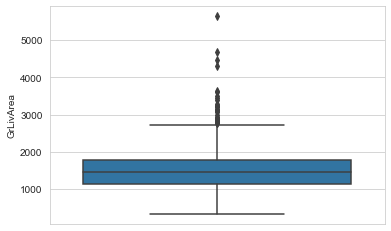

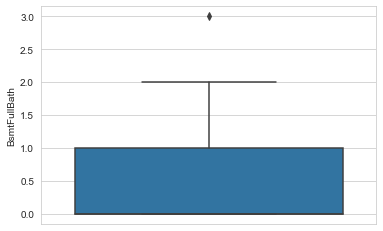

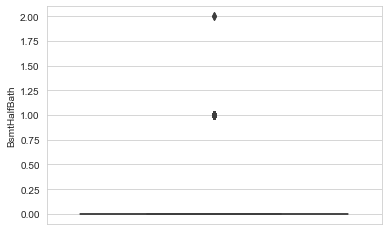

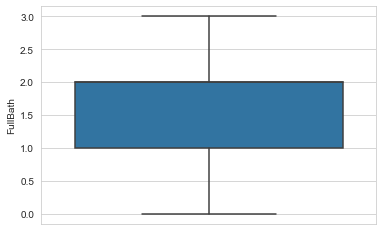

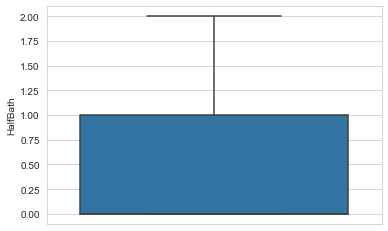

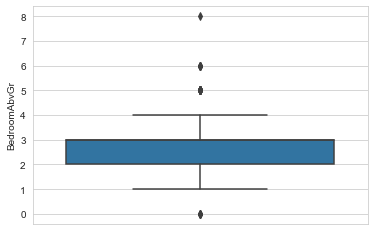

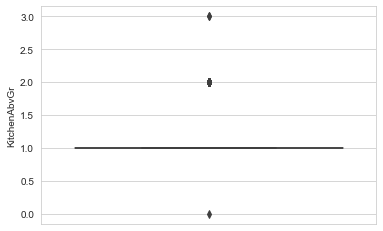

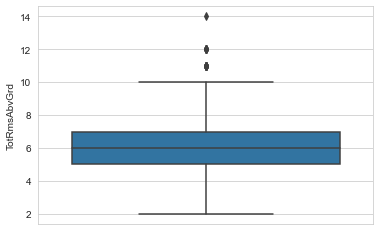

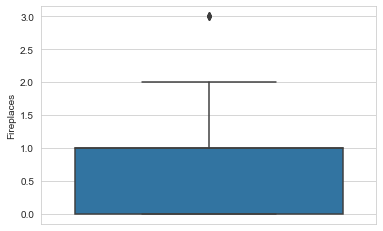

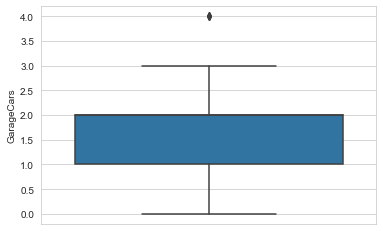

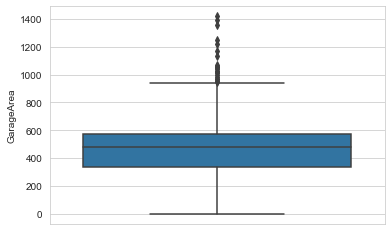

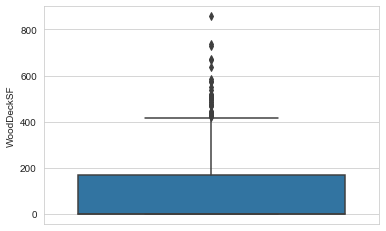

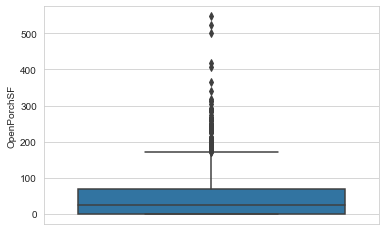

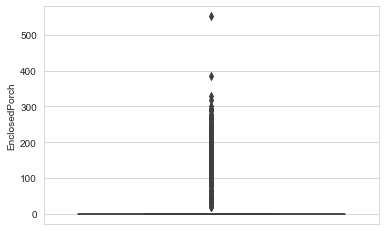

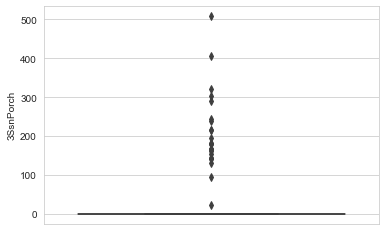

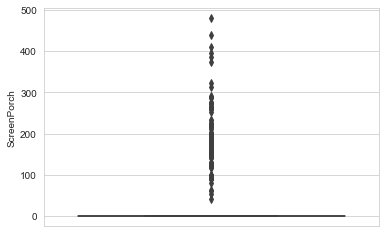

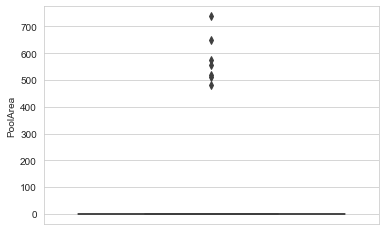

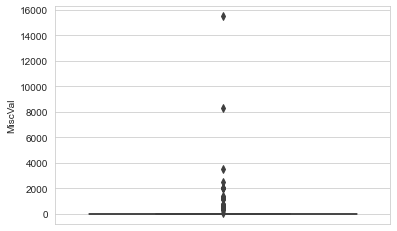

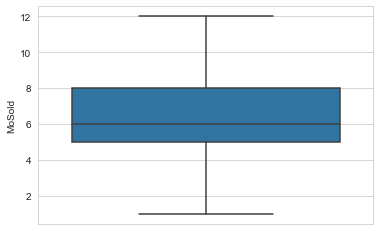

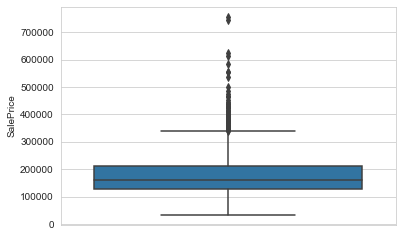

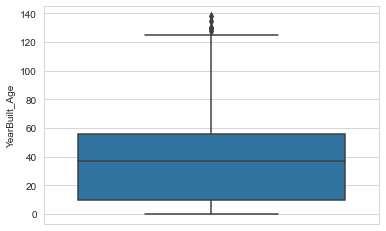

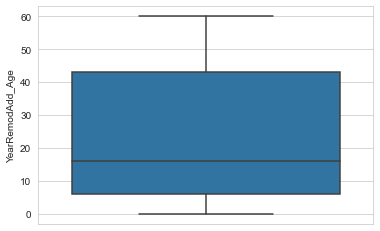

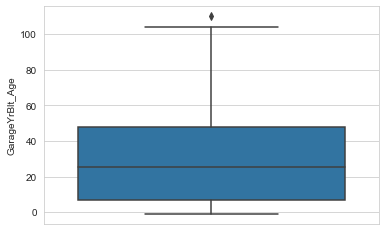

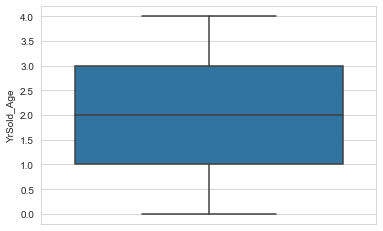

In [30]:
num_columns = house_df.select_dtypes(exclude=[object]) # Get numerical features
for col in num_columns:
    plt.figure()
    sns.boxplot(y=house_df[col])
    plt.show()

## From above plot we can see there are several outliers in numerical variables.
## Lets deal with them using IQR logic

# Outlier Removal

### Note: I won't be using Q3 threshold of .75 because that is reducing total records to 579 from 1460

In [31]:
num_col = list(house_df.dtypes[house_df.dtypes !='object'].index)

def drop_outliers(x):
    list = []
    for col in num_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

house_df = drop_outliers(house_df)

In [32]:
house_df.shape

(1439, 80)

## Let's remove highly correlated features

In [33]:
correlated_features = set()
correlation_matrix = house_df.drop('SalePrice', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [34]:
correlation_matrix

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YearBuilt_Age,YearRemodAdd_Age,GarageYrBlt_Age,YrSold_Age
MSSubClass,1.000000,-0.395490,-0.283156,0.028476,-0.075194,-0.064655,-0.139230,-0.251020,-0.259678,0.308791,0.045754,0.077080,-0.000093,-0.002723,0.128984,0.180802,-0.027485,0.276154,0.036343,-0.046751,-0.034906,-0.095502,-0.021605,-0.005831,-0.015924,-0.037645,-0.024966,NaN,-0.055858,-0.016616,-0.031814,-0.049940,-0.101190,0.024230
LotFrontage,-0.395490,1.000000,0.402362,0.180115,0.132788,0.036737,0.154900,0.316752,0.362284,0.058923,0.015642,0.319015,0.053506,-0.015965,0.177173,0.051388,0.243951,-0.000748,0.310072,0.216606,0.291058,0.316824,0.089010,0.131930,-0.012265,0.061996,0.047484,NaN,0.010557,0.018112,-0.128829,-0.074770,-0.043774,-0.009815
LotArea,-0.283156,0.402362,1.000000,0.138469,0.210681,0.076165,0.047399,0.298575,0.374766,0.101381,0.004383,0.363481,0.130547,0.024147,0.159051,0.076803,0.190708,-0.015888,0.296860,0.306113,0.257345,0.281863,0.224521,0.148035,-0.021259,0.049853,0.098714,NaN,0.005081,0.008028,-0.038565,-0.028555,0.034010,0.027167
MasVnrArea,0.028476,0.180115,0.138469,1.000000,0.245058,-0.070073,0.115736,0.350599,0.331826,0.177039,-0.067511,0.389749,0.079882,0.023951,0.276647,0.200261,0.105462,-0.035521,0.281633,0.241533,0.364466,0.365064,0.162467,0.113456,-0.109265,0.029472,0.062578,NaN,-0.054705,-0.000636,-0.310364,-0.172902,-0.199100,0.008765
BsmtFinSF1,-0.075194,0.132788,0.210681,0.245058,1.000000,-0.060787,-0.516628,0.466170,0.395023,-0.168027,-0.075820,0.140308,0.655741,0.070849,0.041335,-0.006321,-0.121079,-0.080737,0.012544,0.232822,0.232447,0.274908,0.203478,0.092255,-0.114574,0.047268,0.066651,NaN,-0.010253,0.002897,-0.252757,-0.124791,-0.112150,-0.015223
BsmtFinSF2,-0.064655,0.036737,0.076165,-0.070073,-0.060787,1.000000,-0.204952,0.104183,0.094948,-0.104278,0.011186,-0.018159,0.150148,0.072510,-0.083322,-0.036724,-0.021769,-0.042901,-0.046202,0.035590,-0.041774,-0.020864,0.069951,0.006189,0.033111,-0.029440,0.077387,NaN,-0.029285,-0.013124,0.048424,0.064951,0.091573,-0.035057
BsmtUnfSF,-0.139230,0.154900,0.047399,0.115736,-0.516628,-0.204952,1.000000,0.447422,0.340329,0.005948,0.033790,0.259218,-0.419504,-0.097160,0.299421,-0.042297,0.171180,0.032940,0.260665,0.060192,0.214025,0.186623,-0.000217,0.127804,0.001184,-0.003218,-0.007139,NaN,-0.045486,0.033427,-0.148733,-0.182094,-0.169320,0.042145
TotalBsmtSF,-0.251020,0.316752,0.298575,0.350599,0.466170,0.104183,0.447422,1.000000,0.808694,-0.208387,-0.038532,0.414309,0.293059,-0.001757,0.329136,-0.065676,0.047810,-0.065376,0.272329,0.319545,0.452885,0.475917,0.238083,0.234076,-0.105004,0.034340,0.091455,NaN,-0.070283,0.033487,-0.402012,-0.298183,-0.261217,0.015484
1stFlrSF,-0.259678,0.362284,0.374766,0.331826,0.395023,0.094948,0.340329,0.808694,1.000000,-0.230661,-0.016318,0.538406,0.224323,0.002149,0.382672,-0.134634,0.124324,0.080431,0.401287,0.392937,0.449774,0.478982,0.232901,0.196737,-0.068603,0.057462,0.094615,NaN,-0.046919,0.043562,-0.283962,-0.240772,-0.178285,0.012414
2ndFlrSF,0.308791,0.058923,0.101381,0.177039,-0.168027,-0.104278,0.005948,-0.208387,-0.230661,1.000000,0.053111,0.690596,-0.174468,-0.032436,0.417284,0.613404,0.498621,0.052745,0.611264,0.186720,0.182312,0.131859,0.098254,0.203343,0.048197,-0.016339,0.031927,NaN,-0.013219,0.036410,-0.011994,-0.142599,-0.051939,0.022974


## Remove features whose correlation is greater than 0.8

In [35]:
correlated_features

{'1stFlrSF', 'GarageArea', 'TotRmsAbvGrd'}

In [36]:
house_df = house_df.drop(correlated_features, axis='columns')

In [37]:
house_df.shape

(1439, 77)

In [38]:
house_df_numerical = house_df.select_dtypes(exclude=[object]) # Get numerical features

In [39]:
house_df_category = house_df.select_dtypes(include=[object]) # Get categorical features

In [40]:
house_df_category.shape

(1439, 45)

In [41]:
house_df_numerical.shape

(1439, 32)

## Labelencoding the categorcal features to find the skewness among them. While model building, we'll use dummy encoding for categorical features

In [42]:
house_df2 = house_df.copy()

for col in house_df_category:
    le = preprocessing.LabelEncoder()
    house_df2[col] = le.fit_transform(house_df2[col])

In [43]:
house_df2.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,YearBuilt_Age,YearRemodAdd_Age,GarageYrBlt_Age,YrSold_Age
0,60,3,65.0,8450,1,1,3,3,0,4,0,5,2,2,0,5,5,1,1,0,12,13,1,196.0,2,4,2,2,4,3,2,706,6,0,150,856,1,0,1,4,854,0,1710,1,0,2,1,3,1,2,6,0,3,1,2,2,5,5,2,0,61,0,0,0,0,0,4,0,0,2,8,4,208500,7,7,7.0,2
1,20,3,80.0,9600,1,1,3,3,0,2,0,24,1,2,0,2,0,7,1,0,8,8,3,0.0,3,4,1,2,4,1,0,978,6,0,284,1262,1,0,1,4,0,0,1262,0,1,2,0,3,1,3,6,1,5,1,2,2,5,5,2,298,0,0,0,0,0,0,4,0,0,5,8,4,181500,34,34,34.0,3
2,60,3,68.0,11250,1,1,0,3,0,4,0,5,2,2,0,5,5,1,1,0,12,13,1,162.0,2,4,2,2,4,2,2,486,6,0,434,920,1,0,1,4,866,0,1786,1,0,2,1,3,1,2,6,1,5,1,2,2,5,5,2,0,42,0,0,0,0,0,4,0,0,9,8,4,223500,9,8,9.0,2
3,70,3,60.0,9550,1,1,0,3,0,0,0,6,2,2,0,5,5,1,1,0,13,15,3,0.0,3,4,0,4,1,3,0,216,6,0,540,756,1,2,1,4,756,0,1717,1,0,1,0,3,1,2,6,1,2,5,3,3,5,5,2,0,35,272,0,0,0,0,4,0,0,2,8,0,140000,95,40,12.0,4
4,60,3,84.0,14260,1,1,0,3,0,2,0,15,2,2,0,5,8,1,1,0,12,13,1,350.0,2,4,2,2,4,0,2,655,6,0,490,1145,1,0,1,4,1053,0,2198,1,0,2,1,4,1,2,6,1,5,1,2,3,5,5,2,192,84,0,0,0,0,0,4,0,0,12,8,4,250000,10,10,10.0,2


In [44]:
house_df2.shape

(1439, 77)

In [45]:
house_df2["Alley"].value_counts()

1    1348
0      50
2      41
Name: Alley, dtype: int64

In [46]:
house_df["Alley"].value_counts()

No Alley Access    1348
Grvl                 50
Pave                 41
Name: Alley, dtype: int64

In [47]:
house_df.shape

(1439, 77)

## Case 1: If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
## Case 2: If the skewness is between -1 and -0.5 or between 0.5 and 1, the data are moderately skewed
## Case 3: If the skewness is less than -1 or greater than 1, the data are highly skewed

## We'll deal with Case 3 only

In [48]:
house_df2.skew()

MSSubClass           1.403321
MSZoning            -1.728339
LotFrontage          0.628617
LotArea              3.992372
Street             -16.893737
Alley               -0.319335
LotShape            -0.614422
LandContour         -3.198209
Utilities           37.934153
LotConfig           -1.153395
LandSlope            4.873013
Neighborhood         0.033526
Condition1           3.059608
Condition2          11.072253
BldgType             2.234674
HouseStyle           0.306687
OverallQual          0.744011
OverallCond          1.389454
RoofStyle            1.480072
RoofMatl             8.454380
Exterior1st         -0.729639
Exterior2nd         -0.701605
MasVnrType          -0.540585
MasVnrArea           2.693438
ExterQual           -1.831903
ExterCond           -2.603941
Foundation           0.057016
BsmtQual            -0.498801
BsmtCond            -2.953596
BsmtExposure        -1.120590
BsmtFinType1         0.100517
BsmtFinSF1           0.785873
BsmtFinType2        -3.218612
BsmtFinSF2

In [49]:
skewed_cols = []

In [50]:
for col in house_df2.columns:
    if col != "SalePrice":
        if house_df2[col].skew() < -1 or house_df2[col].skew() > 1:
            skewed_cols.append(col)

In [51]:
len(skewed_cols)

43

## Removing skewness from original house_df.
## All the categorical features are present in their original form.

In [52]:
house_df = house_df.drop(skewed_cols, axis='columns')

In [53]:
house_df.shape

(1439, 34)

In [54]:
house_df.head()

,LotFrontage,Alley,LotShape,Neighborhood,HouseStyle,OverallQual,Exterior1st,Exterior2nd,MasVnrType,Foundation,BsmtQual,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,PoolArea,PoolQC,MoSold,SalePrice,YearBuilt_Age,YearRemodAdd_Age,GarageYrBlt_Age,YrSold_Age
0,65.0,No Alley Access,Reg,CollgCr,2Story,Good,VinylSd,VinylSd,BrkFace,PConc,Gd,GLQ,706,150,856,Ex,854,1,2,1,3,0,No Fireplace,Attchd,RFn,2,0,No Pool,2,208500,7,7,7.0,2
1,80.0,No Alley Access,Reg,Veenker,1Story,Above Average,MetalSd,MetalSd,None,CBlock,Gd,ALQ,978,284,1262,Ex,0,0,2,0,3,1,TA,Attchd,RFn,2,0,No Pool,5,181500,34,34,34.0,3
2,68.0,No Alley Access,IR1,CollgCr,2Story,Good,VinylSd,VinylSd,BrkFace,PConc,Gd,GLQ,486,434,920,Ex,866,1,2,1,3,1,TA,Attchd,RFn,2,0,No Pool,9,223500,9,8,9.0,2
3,60.0,No Alley Access,IR1,Crawfor,2Story,Good,Wd Sdng,Wd Shng,None,BrkTil,TA,ALQ,216,540,756,Gd,756,1,1,0,3,1,Gd,Detchd,Unf,3,0,No Pool,2,140000,95,40,12.0,4
4,84.0,No Alley Access,IR1,NoRidge,2Story,Very Good,VinylSd,VinylSd,BrkFace,PConc,Gd,GLQ,655,490,1145,Ex,1053,1,2,1,4,1,TA,Attchd,RFn,3,0,No Pool,12,250000,10,10,10.0,2


In [55]:
house_df_numerical = house_df.select_dtypes(exclude=[object]) # Get numerical features

In [56]:
house_df_category = house_df.select_dtypes(include=[object]) # Get categorical features

In [57]:
house_df_category.shape

(1439, 16)

In [58]:
house_df_numerical.shape

(1439, 18)

## Dummy Variables Encoding

In [59]:
dummy_vars_cols = []

In [60]:
for col in house_df_category:
    dummy_vars = pd.get_dummies(house_df_category[col],prefix=col,drop_first = True)
    dummy_vars_cols = dummy_vars_cols + list(dummy_vars.columns)
    house_df[dummy_vars.columns]= dummy_vars

In [61]:
house_df.head()

,LotFrontage,Alley,LotShape,Neighborhood,HouseStyle,OverallQual,Exterior1st,Exterior2nd,MasVnrType,Foundation,BsmtQual,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,PoolArea,PoolQC,MoSold,SalePrice,YearBuilt_Age,YearRemodAdd_Age,GarageYrBlt_Age,YrSold_Age,Alley_No Alley Access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_No MasVnrType,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf
0,65.0,No Alley Access,Reg,CollgCr,2Story,Good,VinylSd,VinylSd,BrkFace,PConc,Gd,GLQ,706,150,856,Ex,854,1,2,1,3,0,No Fireplace,Attchd,RFn,2,0,No Pool,2,208500,7,7,7.0,2,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
1,80.0,No Alley Access,Reg,Veenker,1Story,Above Average,MetalSd,MetalSd,None,CBlock,Gd,ALQ,978,284,1262,Ex,0,0,2,0,3,1,TA,Attchd,RFn,2,0,No Pool,5,181500,34,34,34.0,3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
2,68.0,No Alley Access,IR1,CollgCr,2Story,Good,VinylSd,VinylSd,BrkFace,PConc,Gd,GLQ,486,434,920,Ex,866,1,2,1,3,1,TA,Attchd,RFn,2,0,No Pool,9,223500,9,8,9.0,2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
3,60.0,No Alley Access,IR1,Crawfor,2Story,Good,Wd Sdng,Wd Shng,None,BrkTil,TA,ALQ,216,540,756,Gd,756,1,1,0,3,1,Gd,Detchd,Unf,3,0,No Pool,2,140000,95,40,12.0,4,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,

In [62]:
house_df.shape

(1439, 145)

In [63]:
house_df = house_df.drop(house_df_category.columns, axis='columns')

In [64]:
house_df.shape

(1439, 129)

# Splitting the Data into Training and Testing Sets

In [65]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(42)
house_df_train, house_df_test = train_test_split(house_df, train_size = 0.7, test_size = 0.3, random_state = 42)

In [66]:
house_df_train.head()

,LotFrontage,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,PoolArea,MoSold,SalePrice,YearBuilt_Age,YearRemodAdd_Age,GarageYrBlt_Age,YrSold_Age,Alley_No Alley Access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_No MasVnrType,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf
96,78.000000,1162,426,1588,0,0,2,0,3,0,2,0,8,214000,11,11,11.0,4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
1180,70.049958,1216,0,1216,1216,0,2,1,4,0,2,0,4,250000,20,19,20.0,4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
445,73.000000,0,1436,1436,0,0,1,0,3,1,2,0,11,127500,54,54,54.0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
1117,57.000000,702,192,894,0,1,1,0,3,0,2,0,5,130000,43,7,43.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
416,74.000000,209,463,672,728,0,1,1,3,1,2,0,3,149500,32,32,32.0,4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0


In [67]:
len(dummy_vars_cols)

111

## Apply scaler() to all the columns except the '0-1' and 'dummy' variables

In [68]:
scaler = MinMaxScaler()

num_vars = list(house_df_numerical.columns)

house_df_train[num_vars] = scaler.fit_transform(house_df_train[num_vars])

In [69]:
house_df_train.head()

,LotFrontage,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,PoolArea,MoSold,SalePrice,YearBuilt_Age,YearRemodAdd_Age,GarageYrBlt_Age,YrSold_Age,Alley_No Alley Access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_No MasVnrType,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf
96,0.354037,0.514159,0.182363,0.495321,0.000000,0.0,0.666667,0.0,0.375,0.000000,0.5,0.0,0.636364,0.248715,0.081481,0.183333,0.108108,1.00,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
1180,0.304658,0.538053,0.000000,0.379289,0.649573,0.0,0.666667,0.5,0.500,0.000000,0.5,0.0,0.272727,0.298709,0.148148,0.316667,0.189189,1.00,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
445,0.322981,0.000000,0.614726,0.447910,0.000000,0.0,0.333333,0.0,0.375,0.333333,0.5,0.0,0.909091,0.128593,0.400000,0.900000,0.495495,0.25,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
1117,0.223602,0.310619,0.082192,0.278852,0.000000,0.5,0.333333,0.0,0.375,0.000000,0.5,0.0,0.363636,0.132065,0.318519,0.116667,0.396396,0.50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
416,0.329193,0.092478,0.198202,0.209607,0.388889,0.0,0.333333,0.5,0.375,0.333333,0.5,0.0,0.181818,0.159145,0.237037,0.533333,0.297297,1.00,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,

In [70]:
house_df_train.describe()

,LotFrontage,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,PoolArea,MoSold,SalePrice,YearBuilt_Age,YearRemodAdd_Age,GarageYrBlt_Age,YrSold_Age,Alley_No Alley Access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_No MasVnrType,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.0,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.00000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.0,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000
mean,0.300219,0.195746,0.239117,0.328235,0.189888,0.210526,0.522344,0.190665,0.359235,0.198279,0.443148,0.0,0.487406,0.202961,0.283953,0.421764,0.275853,0.545929,0.9

### As we can see from above table, all values have been mapped between 0 and 1 where maximum value is 1 and minimum value is 0. This has been performed by MinMaxScaler().

### Dividing into X and Y sets for the model building

In [71]:
y_train = house_df_train.pop('SalePrice')
X_train = house_df_train ## assigning all feature variables to X_train

In [72]:
X_train.shape

(1007, 128)

In [73]:
house_df_test[num_vars] = scaler.transform(house_df_test[num_vars]) #scaling test set

In [74]:
y_test = house_df_test.pop('SalePrice')
X_test = house_df_test

In [75]:
X_test.shape

(432, 128)

## Model Building and Evaluation

## Linear Regression

Let's now try predicting house sale prices dataset using linear regression.

In [76]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [77]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

0.004810807062147204
[ 2.16881331e-02  1.07122149e-02 -4.73123693e-02  2.47327522e-01
  1.55662622e-01  1.01298376e-02  1.42662978e-02  1.50547573e-02
  1.19959729e-02  6.55383422e-02  6.79606448e-02 -3.34517722e+11
 -1.04358831e-02  2.60877641e-02 -3.23078222e-02  1.34741126e-03
  9.00150115e-03  3.37671285e-04 -1.03328077e-02  2.80937593e-02
  1.30437230e-02 -8.79535296e-04 -1.94761785e-02 -9.02541910e-03
  1.28938489e-03  1.11251785e-02  8.08036103e-03  4.28206162e-02
 -2.60441487e-02  1.97889097e-03 -1.58309610e-02 -8.68731408e-03
 -1.44923414e-02 -4.69458172e-03 -4.79466271e-03 -4.83823680e-03
  5.93456683e-02  3.17409105e-02 -2.06259210e-02 -2.88488859e-03
 -1.82169132e-03  7.01133565e-03  2.27779533e-02  4.43132251e-02
  1.32333332e-02  3.80794577e-02  1.22150109e-02  1.33717024e-02
 -4.99166008e-03 -4.78009468e-02 -1.73056585e-02  1.74086997e-02
  2.05810303e-02 -7.63667766e-03 -1.20419578e-02  1.08394766e-01
 -3.11153643e-02  1.62167933e-02 -2.95877709e-02  1.72981629e-01
  4.

In [78]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("Train R2 Score: ",r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Test R2 Score: ",r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Train RSS: ",rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Test RSS: ",rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Train MSE: ",mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Test MSE: ",mse_test_lr)
metric.append(mse_test_lr**0.5)

Train R2 Score:  0.8920202969596893
Test R2 Score:  -1.618456090263551e+22
Train RSS:  1.3001225269582655
Test RSS:  7.869140664719892e+22
Train MSE:  0.0012910849324312466
Test MSE:  1.8215603390555305e+20


## Ridge Regression

In [79]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [80]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 2.0}


In [81]:
#Fitting Ridge model for alpha = 2.0 and printing coefficients which have been penalised
alpha = 2.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 3.34155941e-02  5.88004450e-02  1.15011232e-02  1.36794159e-01
  1.13504166e-01  1.80612181e-02  2.82512405e-02  2.10760361e-02
  2.10042696e-02  5.88903961e-02  6.33028545e-02  0.00000000e+00
 -9.73751477e-03  1.32346278e-02 -3.19327405e-02 -3.25513280e-04
  8.92099790e-03 -1.82970103e-03 -1.06370924e-02  3.10146521e-02
  5.82259698e-03 -2.98641641e-03 -9.15018141e-03 -1.69926732e-02
 -1.87718190e-03  9.04057617e-03  6.97410439e-04  3.62169885e-02
 -2.80015072e-02 -1.06773800e-02 -1.78794544e-02 -1.21692522e-02
 -2.02334066e-02 -8.52475779e-03 -3.52115461e-03 -9.33330135e-03
  5.50860447e-02  2.70659665e-02 -2.05408774e-02 -1.00328234e-02
 -6.41388253e-03 -7.95430878e-05  1.40443396e-02  4.17465125e-02
  3.87324029e-03  2.91617811e-02  4.29382483e-03  5.21032985e-03
  8.43559262e-03 -3.06983752e-02 -1.32169682e-02  8.77996449e-03
  1.19272512e-02 -8.23456832e-03 -1.35344110e-02  9.38773520e-02
 -2.50820386e-02  1.33046260e-02 -9.31408644e-03  1.48622020e-01
  4.68123754e-02 -2.36005

In [82]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("Train R2 Score: ",r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Test R2 Score: ",r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Train RSS: ",rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Test RSS: ",rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Train MSE: ",mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Test MSE: ",mse_test_lr)
metric2.append(mse_test_lr**0.5)

Train R2 Score:  0.8865297577010594
Test R2 Score:  0.8560509190836709
Train RSS:  1.3662310045175026
Test RSS:  0.6998988561396681
Train MSE:  0.0013567338674453848
Test MSE:  0.0016201362410640464


## Lasso Regression

In [83]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [84]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [85]:
#Fitting Lasso model for alpha = 0.0001 and printing coefficients which have been penalised

alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [86]:
lasso.coef_

array([ 3.04074092e-02,  4.28675028e-02, -9.88124680e-03,  2.07048722e-01,
        1.43401372e-01,  1.29166458e-02,  1.10641232e-02,  8.89374323e-03,
        1.16077533e-03,  5.20971253e-02,  6.19258513e-02,  0.00000000e+00,
       -7.88935886e-03, -0.00000000e+00, -3.32399309e-02, -0.00000000e+00,
        6.70235502e-03,  0.00000000e+00, -2.72296102e-03,  2.76172286e-02,
        0.00000000e+00, -2.86859800e-03, -0.00000000e+00, -2.15663481e-03,
        0.00000000e+00,  4.66674854e-03,  2.03255261e-03,  3.99323515e-02,
       -2.09871639e-02, -2.78821979e-03, -8.53554253e-03, -0.00000000e+00,
       -1.26083673e-02, -8.98756640e-04, -0.00000000e+00, -0.00000000e+00,
        4.77841846e-02,  2.38951516e-02, -1.50455023e-02, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  1.35395933e-02,  3.85613207e-02,
        2.88016984e-03,  2.29012091e-02,  0.00000000e+00,  3.45983944e-03,
        0.00000000e+00, -3.33433706e-02, -1.55218992e-02,  2.31400518e-03,
        1.11614095e-02, -

In [87]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("Train R2 Score: ",r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Test R2 Score: ",r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Train RSS: ",rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Test RSS: ",rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Train MSE: ",mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Test MSE: ",mse_test_lr)
metric3.append(mse_test_lr**0.5)

Train R2 Score:  0.8845227092524571
Test R2 Score:  0.8601066652781424
Train RSS:  1.3903967396256116
Test RSS:  0.6801792990279887
Train MSE:  0.001380731618297529
Test MSE:  0.0015744891181203441


In [88]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.920203e-01,0.886530,0.884523
1,R2 Score (Test),-1.618456e+22,0.856051,0.860107
2,RSS (Train),1.300123e+00,1.366231,1.390397
3,RSS (Test),7.869141e+22,0.699899,0.680179
4,MSE (Train),3.593167e-02,0.036834,0.037158
5,MSE (Test),1.349652e+10,0.040251,0.039680


## Lets observe the changes in the coefficients after regularization

In [89]:
betas = pd.DataFrame({"Feature":X_train.columns})

In [90]:
betas.rows = X_train.columns

In [91]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [92]:
pd.set_option('display.max_rows', None)
betas

,Feature,Linear,Ridge,Lasso
0,LotFrontage,2.168813e-02,0.033416,0.030407
1,BsmtFinSF1,1.071221e-02,0.058800,0.042868
2,BsmtUnfSF,-4.731237e-02,0.011501,-0.009881
3,TotalBsmtSF,2.473275e-01,0.136794,0.207049
4,2ndFlrSF,1.556626e-01,0.113504,0.143401
5,BsmtFullBath,1.012984e-02,0.018061,0.012917
6,FullBath,1.426630e-02,0.028251,0.011064
7,HalfBath,1.505476e-02,0.021076,0.008894
8,BedroomAbvGr,1.199597e-02,0.021004,0.001161
9,Fireplaces,6.553834e-02,0.058890,0.052097


In [93]:
betas_ = betas[betas["Lasso"] > 0]

In [94]:
betas.shape

(128, 4)

In [95]:
betas_.shape

(40, 4)

In [96]:
list(betas_["Feature"])

['LotFrontage',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '2ndFlrSF',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'Fireplaces',
 'GarageCars',
 'YrSold_Age',
 'LotShape_IR2',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'HouseStyle_1Story',
 'HouseStyle_SFoyer',
 'HouseStyle_SLvl',
 'OverallQual_Excellent',
 'OverallQual_Good',
 'OverallQual_Very Excellent',
 'OverallQual_Very Good',
 'Exterior1st_BrkFace',
 'Exterior1st_Stone',
 'Exterior1st_Stucco',
 'Exterior2nd_Plywood',
 'Exterior2nd_VinylSd',
 'Exterior2nd_Wd Sdng',
 'MasVnrType_BrkFace',
 'MasVnrType_Stone',
 'Foundation_PConc',
 'GarageType_Attchd',
 'GarageType_Basment',
 'GarageType_BuiltIn']

# Model 2 - Let's create another model using 40 features suggested by Lasso

In [97]:
X_train = X_train[list(betas_["Feature"])]

In [98]:
X_train.shape

(1007, 40)

In [99]:
X_test = X_test[list(betas_["Feature"])]

In [100]:
X_test.shape

(432, 40)

## Multiple Linear Regression

In [101]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [102]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-0.0257751521613285
[0.04143246 0.05624802 0.16460149 0.13382863 0.01775288 0.03140287
 0.01611129 0.00503983 0.04227438 0.06149605 0.00382739 0.0348388
 0.0211003  0.00940276 0.05189863 0.05340579 0.04443827 0.02763996
 0.05861914 0.01971387 0.05229112 0.01960441 0.02369887 0.02420182
 0.14157602 0.02233644 0.21355985 0.06238319 0.02364447 0.06351677
 0.00465826 0.0060352  0.01164847 0.00895055 0.00534664 0.01286242
 0.00979978 0.01106853 0.0050382  0.00666593]


In [103]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("Train R2 Score: ",r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Test R2 Score: ",r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Train RSS: ",rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Test RSS: ",rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Train MSE: ",mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Test MSE: ",mse_test_lr)
metric.append(mse_test_lr**0.5)

Train R2 Score:  0.865566810678216
Test R2 Score:  0.8499213227557035
Train RSS:  1.6186339921943342
Test RSS:  0.7297017380423041
Train MSE:  0.001607382315982457
Test MSE:  0.0016891243936164447


## Ridge Regression

In [104]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [105]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.8}


In [106]:
#Fitting Ridge model for alpha = 0.8 and printing coefficients which have been penalised
alpha = 0.8
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[0.04364054 0.05804674 0.15457862 0.12094616 0.0181712  0.0362311
 0.01820675 0.0076437  0.04438831 0.06359584 0.00405995 0.03439948
 0.0207931  0.00900781 0.0514543  0.05458508 0.04567846 0.02686715
 0.05693257 0.01959504 0.04740396 0.01644186 0.01934544 0.01985936
 0.13569265 0.02109406 0.19944313 0.06073934 0.02298791 0.04510157
 0.00457814 0.00541769 0.01106723 0.00875984 0.00552188 0.01361641
 0.01094857 0.01123985 0.00454655 0.00832967]


In [107]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("Train R2 Score: ",r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Test R2 Score: ",r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Train RSS: ",rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Test RSS: ",rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Train MSE: ",mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Test MSE: ",mse_test_lr)
metric2.append(mse_test_lr**0.5)

Train R2 Score:  0.8650686335598348
Test R2 Score:  0.8497661018671356
Train RSS:  1.6246322610891908
Test RSS:  0.7304564418699774
Train MSE:  0.001613338888867121
Test MSE:  0.0016908713932175402


## Lasso Regression

In [108]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [109]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [110]:
#Fitting Lasso model for alpha = 0.0001 and printing coefficients which have been penalised

alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [111]:
lasso.coef_

array([0.04097857, 0.05790958, 0.16490753, 0.12140613, 0.01726504,
       0.03322181, 0.01454574, 0.        , 0.0433848 , 0.06524695,
       0.0030732 , 0.03166736, 0.01566803, 0.00563917, 0.04916441,
       0.04771515, 0.03940361, 0.02186183, 0.04708333, 0.01470366,
       0.03655754, 0.01342116, 0.01162463, 0.01680485, 0.13993465,
       0.02217405, 0.20699112, 0.06445239, 0.02020429, 0.01130918,
       0.        , 0.003955  , 0.0102436 , 0.00628988, 0.00484123,
       0.01131488, 0.01136531, 0.01135232, 0.        , 0.00750105])

In [112]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("Train R2 Score: ",r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Test R2 Score: ",r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Train RSS: ",rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Test RSS: ",rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Train MSE: ",mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Test MSE: ",mse_test_lr)
metric3.append(mse_test_lr**0.5)

Train R2 Score:  0.8641258253156852
Test R2 Score:  0.8505813852802206
Train RSS:  1.6359840818694658
Test RSS:  0.726492429563574
Train MSE:  0.0016246117992745439
Test MSE:  0.0016816954388045693


In [113]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.865567,0.865069,0.864126
1,R2 Score (Test),0.849921,0.849766,0.850581
2,RSS (Train),1.618634,1.624632,1.635984
3,RSS (Test),0.729702,0.730456,0.726492
4,MSE (Train),0.040092,0.040166,0.040306
5,MSE (Test),0.041099,0.041120,0.041008


## Lets observe the changes in the coefficients after regularization

In [114]:
betas = pd.DataFrame({"Feature":X_train.columns})

In [115]:
betas.rows = X_train.columns

In [116]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [117]:
pd.set_option('display.max_rows', None)
betas

,Feature,Linear,Ridge,Lasso
0,LotFrontage,0.041432,0.043641,0.040979
1,BsmtFinSF1,0.056248,0.058047,0.057910
2,TotalBsmtSF,0.164601,0.154579,0.164908
3,2ndFlrSF,0.133829,0.120946,0.121406
4,BsmtFullBath,0.017753,0.018171,0.017265
5,FullBath,0.031403,0.036231,0.033222
6,HalfBath,0.016111,0.018207,0.014546
7,BedroomAbvGr,0.005040,0.007644,0.000000
8,Fireplaces,0.042274,0.044388,0.043385
9,GarageCars,0.061496,0.063596,0.065247


In [118]:
betas_ = betas[betas["Lasso"] > 0]

In [119]:
betas.shape

(40, 4)

In [120]:
betas_.shape

(37, 4)

In [121]:
list(betas_["Feature"])

['LotFrontage',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '2ndFlrSF',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'Fireplaces',
 'GarageCars',
 'YrSold_Age',
 'LotShape_IR2',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'HouseStyle_1Story',
 'HouseStyle_SFoyer',
 'HouseStyle_SLvl',
 'OverallQual_Excellent',
 'OverallQual_Good',
 'OverallQual_Very Excellent',
 'OverallQual_Very Good',
 'Exterior1st_BrkFace',
 'Exterior1st_Stone',
 'Exterior2nd_Plywood',
 'Exterior2nd_VinylSd',
 'Exterior2nd_Wd Sdng',
 'MasVnrType_BrkFace',
 'MasVnrType_Stone',
 'Foundation_PConc',
 'GarageType_Attchd',
 'GarageType_BuiltIn']

## Model 3 - Let's create 3rd model using 37 features suggested by Lasso

In [122]:
X_train = X_train[list(betas_["Feature"])]

In [123]:
X_train.shape

(1007, 37)

In [124]:
X_test = X_test[list(betas_["Feature"])]

In [125]:
X_test.shape

(432, 37)

## Multiple Linear Regression

In [126]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [127]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-0.024641471962020045
[0.04260056 0.05598807 0.16547683 0.13554791 0.01772062 0.03193074
 0.01599237 0.04265408 0.06127192 0.00383947 0.03485276 0.02065821
 0.00930911 0.05201154 0.05311346 0.0441499  0.02733131 0.05811816
 0.01989846 0.05190898 0.01984807 0.02408242 0.0251311  0.1414755
 0.0222314  0.21286232 0.06233148 0.02371387 0.06279009 0.00597643
 0.01151054 0.00878104 0.00540131 0.01285381 0.00986513 0.01053846
 0.00594053]


In [128]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("Train R2 Score: ",r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Test R2 Score: ",r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Train RSS: ",rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Test RSS: ",rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Train MSE: ",mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Test MSE: ",mse_test_lr)
metric.append(mse_test_lr**0.5)

Train R2 Score:  0.865500590324126
Test R2 Score:  0.8495867073427581
Train RSS:  1.6194313140212273
Test RSS:  0.7313286810090559
Train MSE:  0.0016081740953537511
Test MSE:  0.0016928904652987406


## Ridge Regression

In [129]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [130]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.05}


In [131]:
#Fitting Ridge model for alpha = 0.05 and printing coefficients which have been penalised
alpha = 0.05
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[0.0427939  0.05611119 0.16481926 0.13465222 0.01774799 0.03230839
 0.01614045 0.04278951 0.06141311 0.00385788 0.03482868 0.02063547
 0.00928449 0.05199472 0.05320727 0.04422943 0.02727594 0.05800162
 0.01990388 0.05156826 0.01961454 0.02375489 0.0248125  0.14107828
 0.02214484 0.21190279 0.06221845 0.02366747 0.06120389 0.00593185
 0.01146735 0.00876824 0.00541198 0.01290202 0.00993296 0.01054996
 0.00606693]


In [132]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("Train R2 Score: ",r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Test R2 Score: ",r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Train RSS: ",rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Test RSS: ",rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Train MSE: ",mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Test MSE: ",mse_test_lr)
metric2.append(mse_test_lr**0.5)

Train R2 Score:  0.8654981435000576
Test R2 Score:  0.8496099799888622
Train RSS:  1.6194607748458205
Test RSS:  0.7312155264249214
Train MSE:  0.0016082033513861178
Test MSE:  0.0016926285333910217


## Lasso Regression

In [133]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [134]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [135]:
#Fitting Lasso model for alpha = 0.0001 and printing coefficients which have been penalised

alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [136]:
lasso.coef_

array([0.04100459, 0.05789421, 0.16489263, 0.12122702, 0.01727796,
       0.03323905, 0.01453969, 0.04338414, 0.0652696 , 0.00307398,
       0.03166964, 0.01567327, 0.00564183, 0.04916823, 0.04773042,
       0.03940216, 0.02186251, 0.04709011, 0.01470505, 0.03656697,
       0.01335112, 0.01156002, 0.01674262, 0.13993856, 0.02218014,
       0.20701412, 0.06445867, 0.02020838, 0.0113035 , 0.00395469,
       0.01024157, 0.00628819, 0.00484437, 0.01131051, 0.01136206,
       0.01135503, 0.00753286])

In [137]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("Train R2 Score: ",r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Test R2 Score: ",r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Train RSS: ",rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Test RSS: ",rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Train MSE: ",mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Test MSE: ",mse_test_lr)
metric3.append(mse_test_lr**0.5)

Train R2 Score:  0.8641220869015226
Test R2 Score:  0.8505886442418994
Train RSS:  1.6360290939998103
Test RSS:  0.726457135562783
Train MSE:  0.0016246564985102387
Test MSE:  0.0016816137397286644


In [138]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.865501,0.865498,0.864122
1,R2 Score (Test),0.849587,0.849610,0.850589
2,RSS (Train),1.619431,1.619461,1.636029
3,RSS (Test),0.731329,0.731216,0.726457
4,MSE (Train),0.040102,0.040102,0.040307
5,MSE (Test),0.041145,0.041142,0.041007


## Lets observe the changes in the coefficients after regularization

In [139]:
betas = pd.DataFrame({"Feature":X_train.columns})

In [140]:
betas.rows = X_train.columns

In [141]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [142]:
pd.set_option('display.max_rows', None)
betas

,Feature,Linear,Ridge,Lasso
0,LotFrontage,0.042601,0.042794,0.041005
1,BsmtFinSF1,0.055988,0.056111,0.057894
2,TotalBsmtSF,0.165477,0.164819,0.164893
3,2ndFlrSF,0.135548,0.134652,0.121227
4,BsmtFullBath,0.017721,0.017748,0.017278
5,FullBath,0.031931,0.032308,0.033239
6,HalfBath,0.015992,0.016140,0.014540
7,Fireplaces,0.042654,0.042790,0.043384
8,GarageCars,0.061272,0.061413,0.065270
9,YrSold_Age,0.003839,0.003858,0.003074


In [143]:
betas_ = betas[betas["Lasso"] > 0]

In [144]:
betas.shape

(37, 4)

In [145]:
betas_.shape

(37, 4)

In [146]:
list(betas_["Feature"])

['LotFrontage',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '2ndFlrSF',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'Fireplaces',
 'GarageCars',
 'YrSold_Age',
 'LotShape_IR2',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'HouseStyle_1Story',
 'HouseStyle_SFoyer',
 'HouseStyle_SLvl',
 'OverallQual_Excellent',
 'OverallQual_Good',
 'OverallQual_Very Excellent',
 'OverallQual_Very Good',
 'Exterior1st_BrkFace',
 'Exterior1st_Stone',
 'Exterior2nd_Plywood',
 'Exterior2nd_VinylSd',
 'Exterior2nd_Wd Sdng',
 'MasVnrType_BrkFace',
 'MasVnrType_Stone',
 'Foundation_PConc',
 'GarageType_Attchd',
 'GarageType_BuiltIn']

In [147]:
sorted_df = betas_.sort_values(by=['Lasso'], ascending=False).reset_index(drop=True)

In [148]:
sorted_df.head(10)

,Feature,Linear,Ridge,Lasso
0,OverallQual_Very Excellent,0.212862,0.211903,0.207014
1,TotalBsmtSF,0.165477,0.164819,0.164893
2,OverallQual_Excellent,0.141476,0.141078,0.139939
3,2ndFlrSF,0.135548,0.134652,0.121227
4,GarageCars,0.061272,0.061413,0.065270
5,OverallQual_Very Good,0.062331,0.062218,0.064459
6,BsmtFinSF1,0.055988,0.056111,0.057894
7,Neighborhood_Crawfor,0.052012,0.051995,0.049168
8,Neighborhood_NoRidge,0.053113,0.053207,0.047730
9,Neighborhood_StoneBr,0.058118,0.058002,0.047090


In [149]:
sorted_df2 = betas_.sort_values(by=['Ridge'], ascending=False).reset_index(drop=True)

In [150]:
sorted_df2.head(10)

,Feature,Linear,Ridge,Lasso
0,OverallQual_Very Excellent,0.212862,0.211903,0.207014
1,TotalBsmtSF,0.165477,0.164819,0.164893
2,OverallQual_Excellent,0.141476,0.141078,0.139939
3,2ndFlrSF,0.135548,0.134652,0.121227
4,OverallQual_Very Good,0.062331,0.062218,0.064459
5,GarageCars,0.061272,0.061413,0.065270
6,Exterior1st_Stone,0.062790,0.061204,0.011304
7,Neighborhood_StoneBr,0.058118,0.058002,0.047090
8,BsmtFinSF1,0.055988,0.056111,0.057894
9,Neighborhood_NoRidge,0.053113,0.053207,0.047730


## 37 features have been suggested by Lasso. Now let's apply RFE to cut down some more features and make the model simple

## RFE (Recursive Feature Elimination)

In [151]:
# Running RFE with the output number of variables equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15) # running RFE
rfe = rfe.fit(X_train, y_train)

In [152]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', True, 1),
 ('BsmtFinSF1', True, 1),
 ('TotalBsmtSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('BsmtFullBath', False, 8),
 ('FullBath', True, 1),
 ('HalfBath', False, 5),
 ('Fireplaces', True, 1),
 ('GarageCars', True, 1),
 ('YrSold_Age', False, 23),
 ('LotShape_IR2', True, 1),
 ('Neighborhood_ClearCr', False, 6),
 ('Neighborhood_CollgCr', False, 18),
 ('Neighborhood_Crawfor', True, 1),
 ('Neighborhood_NoRidge', False, 2),
 ('Neighborhood_NridgHt', False, 4),
 ('Neighborhood_Somerst', False, 7),
 ('Neighborhood_StoneBr', False, 3),
 ('Neighborhood_Timber', False, 14),
 ('Neighborhood_Veenker', True, 1),
 ('HouseStyle_1Story', False, 10),
 ('HouseStyle_SFoyer', False, 11),
 ('HouseStyle_SLvl', False, 9),
 ('OverallQual_Excellent', True, 1),
 ('OverallQual_Good', True, 1),
 ('OverallQual_Very Excellent', True, 1),
 ('OverallQual_Very Good', True, 1),
 ('Exterior1st_BrkFace', False, 12),
 ('Exterior1st_Stone', True, 1),
 ('Exterior2nd_Plywood', False, 21),
 ('Exterior2nd_VinylS

In [153]:
col = X_train.columns[rfe.support_] ## variables suggested by RFE
col

Index(['LotFrontage', 'BsmtFinSF1', 'TotalBsmtSF', '2ndFlrSF', 'FullBath',
       'Fireplaces', 'GarageCars', 'LotShape_IR2', 'Neighborhood_Crawfor',
       'Neighborhood_Veenker', 'OverallQual_Excellent', 'OverallQual_Good',
       'OverallQual_Very Excellent', 'OverallQual_Very Good',
       'Exterior1st_Stone'],
      dtype='object')

# Model 4

In [154]:
X_train = X_train[col]

In [155]:
X_train.shape

(1007, 15)

In [156]:
X_test = X_test[col]

In [157]:
X_test.shape

(432, 15)

## Multiple Linear Regression

In [158]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [159]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-0.012130453132392083
[0.05555469 0.08489174 0.18624075 0.10752044 0.04086948 0.04390027
 0.08738919 0.03640581 0.03601288 0.04136383 0.17801768 0.04136407
 0.23769842 0.09978082 0.05155409]


In [160]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("Train R2 Score: ",r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Test R2 Score: ",r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Train RSS: ",rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Test RSS: ",rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Train MSE: ",mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Test MSE: ",mse_test_lr)
metric.append(mse_test_lr**0.5)

Train R2 Score:  0.8409446495074507
Test R2 Score:  0.840299777213192
Train RSS:  1.9150955076381986
Test RSS:  0.7764829239771674
Train MSE:  0.0019017830264530275
Test MSE:  0.0017974141758730728


## Ridge Regression

In [161]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [162]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 1.0}


In [163]:
#Fitting Ridge model for alpha = 1.0 and printing coefficients which have been penalised
alpha = 1.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[0.05637115 0.08672129 0.1761893  0.10369288 0.04596666 0.04672461
 0.09027858 0.03564767 0.03517206 0.03614001 0.17066506 0.03983806
 0.21895555 0.09788092 0.03413332]


In [164]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("Train R2 Score: ",r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Test R2 Score: ",r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Train RSS: ",rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Test RSS: ",rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Train MSE: ",mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Test MSE: ",mse_test_lr)
metric2.append(mse_test_lr**0.5)

Train R2 Score:  0.8402983680070933
Test R2 Score:  0.8397113771466141
Train RSS:  1.9228770176230645
Test RSS:  0.77934380041298
Train MSE:  0.0019095104445114842
Test MSE:  0.0018040365750300463


## Lasso Regression

In [165]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [166]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [167]:
#Fitting Lasso model for alpha = 0.0001 and printing coefficients which have been penalised

alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [168]:
lasso.coef_

array([0.05116239, 0.08416634, 0.18506064, 0.10594322, 0.04089771,
       0.0448414 , 0.08930233, 0.03278325, 0.03412294, 0.02664337,
       0.17420324, 0.04024406, 0.22961111, 0.09881742, 0.0016439 ])

In [169]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("Train R2 Score: ",r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Test R2 Score: ",r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Train RSS: ",rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Test RSS: ",rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Train MSE: ",mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Test MSE: ",mse_test_lr)
metric3.append(mse_test_lr**0.5)

Train R2 Score:  0.8401992901314188
Test R2 Score:  0.840888929980365
Train RSS:  1.9240699582819167
Test RSS:  0.77361838781472
Train MSE:  0.0019106950926334823
Test MSE:  0.0017907833051266668


In [170]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.840945,0.840298,0.840199
1,R2 Score (Test),0.840300,0.839711,0.840889
2,RSS (Train),1.915096,1.922877,1.924070
3,RSS (Test),0.776483,0.779344,0.773618
4,MSE (Train),0.043609,0.043698,0.043711
5,MSE (Test),0.042396,0.042474,0.042318


## Lets observe the changes in the coefficients after regularization

In [171]:
betas = pd.DataFrame({"Feature":X_train.columns})

In [172]:
betas.rows = X_train.columns

In [173]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [174]:
pd.set_option('display.max_rows', None)
betas

,Feature,Linear,Ridge,Lasso
0,LotFrontage,0.055555,0.056371,0.051162
1,BsmtFinSF1,0.084892,0.086721,0.084166
2,TotalBsmtSF,0.186241,0.176189,0.185061
3,2ndFlrSF,0.107520,0.103693,0.105943
4,FullBath,0.040869,0.045967,0.040898
5,Fireplaces,0.043900,0.046725,0.044841
6,GarageCars,0.087389,0.090279,0.089302
7,LotShape_IR2,0.036406,0.035648,0.032783
8,Neighborhood_Crawfor,0.036013,0.035172,0.034123
9,Neighborhood_Veenker,0.041364,0.036140,0.026643


In [175]:
betas_ = betas[betas["Lasso"] > 0]

In [176]:
betas.shape

(15, 4)

In [177]:
betas_.shape

(15, 4)

## Lasso is not eliminating any features now !!

In [178]:
list(betas_["Feature"])

['LotFrontage',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '2ndFlrSF',
 'FullBath',
 'Fireplaces',
 'GarageCars',
 'LotShape_IR2',
 'Neighborhood_Crawfor',
 'Neighborhood_Veenker',
 'OverallQual_Excellent',
 'OverallQual_Good',
 'OverallQual_Very Excellent',
 'OverallQual_Very Good',
 'Exterior1st_Stone']

In [179]:
sorted_df = betas_.sort_values(by=['Lasso'], ascending=False).reset_index(drop=True)

In [180]:
sorted_df

,Feature,Linear,Ridge,Lasso
0,OverallQual_Very Excellent,0.237698,0.218956,0.229611
1,TotalBsmtSF,0.186241,0.176189,0.185061
2,OverallQual_Excellent,0.178018,0.170665,0.174203
3,2ndFlrSF,0.107520,0.103693,0.105943
4,OverallQual_Very Good,0.099781,0.097881,0.098817
5,GarageCars,0.087389,0.090279,0.089302
6,BsmtFinSF1,0.084892,0.086721,0.084166
7,LotFrontage,0.055555,0.056371,0.051162
8,Fireplaces,0.043900,0.046725,0.044841
9,FullBath,0.040869,0.045967,0.040898


In [181]:
sorted_df2 = betas_.sort_values(by=['Ridge'], ascending=False).reset_index(drop=True)

In [182]:
sorted_df2

,Feature,Linear,Ridge,Lasso
0,OverallQual_Very Excellent,0.237698,0.218956,0.229611
1,TotalBsmtSF,0.186241,0.176189,0.185061
2,OverallQual_Excellent,0.178018,0.170665,0.174203
3,2ndFlrSF,0.107520,0.103693,0.105943
4,OverallQual_Very Good,0.099781,0.097881,0.098817
5,GarageCars,0.087389,0.090279,0.089302
6,BsmtFinSF1,0.084892,0.086721,0.084166
7,LotFrontage,0.055555,0.056371,0.051162
8,Fireplaces,0.043900,0.046725,0.044841
9,FullBath,0.040869,0.045967,0.040898


In [183]:
y_train_price = lm.predict(X_train)

In [184]:
%matplotlib inline

Text(0.5, 0, 'Errors')

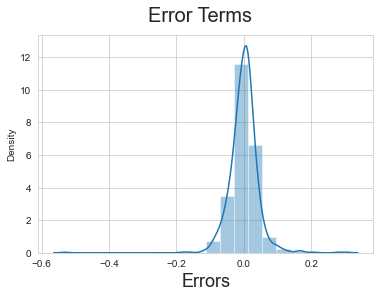

In [185]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## The residuals are following the normally distributed with a mean 0. All good!

## Looking for patterns in the residuals

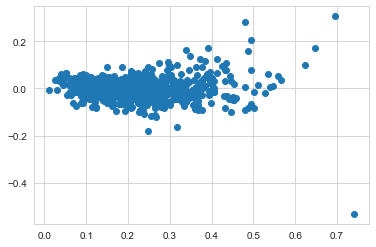

In [186]:
plt.scatter(y_train_price,(y_train - y_train_price))
plt.show()

## From above plot we can see that residuals (also known as error terms) are independent. This means that there is no correlation between the residuals and the predicted values, or among the residuals themselves.

## We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.

## Model Evaluation

In [187]:
y_pred = lm.predict(X_test)

Text(0, 0.5, 'y_pred')

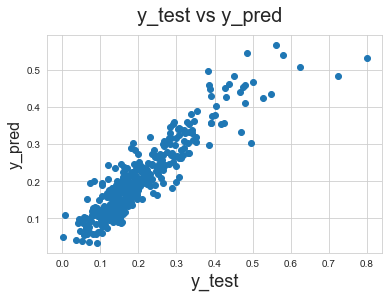

In [188]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

# Conclusion

In [189]:
final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.840945,0.840298,0.840199
1,R2 Score (Test),0.840300,0.839711,0.840889
2,RSS (Train),1.915096,1.922877,1.924070
3,RSS (Test),0.776483,0.779344,0.773618
4,MSE (Train),0.043609,0.043698,0.043711
5,MSE (Test),0.042396,0.042474,0.042318


## Based on final_metric result, we can see that Train R2 score for Linear, Ridge and Lasso Regression are almost same but Test R2 score is high for Lasso.
## We'll consider Lasso as our final model because we know it helps in feature selection. It also reduces overfitting !!

## Note: We are not dropping features below 15 because that is significantly reducing the R2 score. 
## This model is simple considering the feature drop from initial 80 (excluding SalePrice) to 15

In [190]:
# Final Model
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print("Lasso (Train R2 score): ",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Lasso (Test R2 score): ",r2_score(y_true=y_test,y_pred=y_test_pred))

Lasso (Train R2 score):  0.8401992901314188
Lasso (Test R2 score):  0.840888929980365


In [191]:
sorted_df.head() ## sorted in descending order on Lasso column

,Feature,Linear,Ridge,Lasso
0,OverallQual_Very Excellent,0.237698,0.218956,0.229611
1,TotalBsmtSF,0.186241,0.176189,0.185061
2,OverallQual_Excellent,0.178018,0.170665,0.174203
3,2ndFlrSF,0.107520,0.103693,0.105943
4,OverallQual_Very Good,0.099781,0.097881,0.098817


In [192]:
sorted_df2.head() ## sorted in descending order on Ridge column

,Feature,Linear,Ridge,Lasso
0,OverallQual_Very Excellent,0.237698,0.218956,0.229611
1,TotalBsmtSF,0.186241,0.176189,0.185061
2,OverallQual_Excellent,0.178018,0.170665,0.174203
3,2ndFlrSF,0.107520,0.103693,0.105943
4,OverallQual_Very Good,0.099781,0.097881,0.098817


## Top 5 significant features

### 1) OverallQual_Very Excellent : Very Excellent (10) rating of the overall material and finish of the house
### 2) TotalBsmtSF : Total square feet of basement area
### 3) OverallQual_Excellent : Excellent (9) rating of the overall material and finish of the house 
### 4) 2ndFlrSF : Second floor square feet
### 5) OverallQual_Very Good : Very Good (8) rating of the overall material and finish of the house

### Best alpha value for Lasso : 0.0001
### Best alpha value for Ridge : 1.0

# Assignment Part 2 - Subjective Questions Calculation and Analysis

## Question-1
### Sub part 1: What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? 

In [193]:
lasso2 = Lasso(alpha=0.0002) ## double the alpha and interpret the result
lasso2.fit(X_train,y_train)

y_train_pred2 = lasso2.predict(X_train)
y_test_pred2 = lasso2.predict(X_test)

print("Lasso Train R2 score: ",r2_score(y_true=y_train,y_pred=y_train_pred2).round(6))
print("Lasso Test R2 score: ",r2_score(y_true=y_test,y_pred=y_test_pred2).round(6))

ridge2 = Ridge(alpha=2.0) ## double the alpha and interpret the result
ridge2.fit(X_train,y_train)

y_train_pred2 = ridge2.predict(X_train)
y_test_pred2 = ridge2.predict(X_test)

print("Ridge Train R2 score: ",r2_score(y_true=y_train,y_pred=y_train_pred2).round(6))
print("Ridge Test R2 score: ",r2_score(y_true=y_test,y_pred=y_test_pred2).round(6))

Lasso Train R2 score:  0.839152
Lasso Test R2 score:  0.840816
Ridge Train R2 score:  0.838767
Ridge Test R2 score:  0.838242


### Sub part 2: What will be the most important predictor variables after the change is implemented?

### Lets observe the changes in the coefficients after above regularization

In [194]:
betas2 = pd.DataFrame({"Feature":X_train.columns})

In [195]:
betas2.rows = X_train.columns

In [196]:
betas2['Ridge'] = ridge2.coef_
betas2['Lasso'] = lasso2.coef_

In [197]:
pd.set_option('display.max_rows', None)
betas2

,Feature,Ridge,Lasso
0,LotFrontage,0.056692,0.046399
1,BsmtFinSF1,0.087933,0.083275
2,TotalBsmtSF,0.167703,0.184122
3,2ndFlrSF,0.100434,0.104895
4,FullBath,0.050002,0.040758
5,Fireplaces,0.049094,0.045706
6,GarageCars,0.092509,0.091183
7,LotShape_IR2,0.034917,0.029178
8,Neighborhood_Crawfor,0.034170,0.030882
9,Neighborhood_Veenker,0.032168,0.012037


In [198]:
betas2_ = betas2[betas2["Lasso"] > 0]

In [199]:
betas2.shape

(15, 3)

In [200]:
betas2_.shape

(14, 3)

In [201]:
list(set(betas2["Feature"]) - set(betas2_["Feature"]))

['Exterior1st_Stone']

In [202]:
sorted_df_lasso = betas2_.sort_values(by=['Lasso'], ascending=False).reset_index(drop=True)

In [203]:
sorted_df_lasso.head()

,Feature,Ridge,Lasso
0,OverallQual_Very Excellent,0.203227,0.221557
1,TotalBsmtSF,0.167703,0.184122
2,OverallQual_Excellent,0.164144,0.170478
3,2ndFlrSF,0.100434,0.104895
4,OverallQual_Very Good,0.096258,0.097541


In [204]:
sorted_df_ridge = betas2_.sort_values(by=['Ridge'], ascending=False).reset_index(drop=True)

In [205]:
sorted_df_ridge.head()

,Feature,Ridge,Lasso
0,OverallQual_Very Excellent,0.203227,0.221557
1,TotalBsmtSF,0.167703,0.184122
2,OverallQual_Excellent,0.164144,0.170478
3,2ndFlrSF,0.100434,0.104895
4,OverallQual_Very Good,0.096258,0.097541


## Question-3:
## After building the model, you realised that the five most important predictor variables in the lasso model 
## are not available in the incoming data. 
## You will now have to create another model excluding the five most important predictor variables. 
## Which are the five most important predictor variables now?

In [206]:
top_5_features_to_drop = list(sorted_df_lasso["Feature"].head())

In [207]:
top_5_features_to_drop

['OverallQual_Very Excellent',
 'TotalBsmtSF',
 'OverallQual_Excellent',
 '2ndFlrSF',
 'OverallQual_Very Good']

In [208]:
new_cols = list(set(sorted_df_lasso["Feature"]) - set(top_5_features_to_drop))

In [209]:
X_train = X_train[new_cols]

In [210]:
X_train.shape

(1007, 9)

In [211]:
X_test = X_test[new_cols]

In [212]:
X_test.shape

(432, 9)

## Multiple Linear Regression

In [213]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [214]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-0.06141801749013753
[0.10336857 0.0441312  0.03750029 0.20344702 0.13606035 0.04474582
 0.10945213 0.00187549 0.1737859 ]


In [215]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("Train R2 Score: ",r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Test R2 Score: ",r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Train RSS: ",rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Test RSS: ",rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Train MSE: ",mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Test MSE: ",mse_test_lr)
metric.append(mse_test_lr**0.5)

Train R2 Score:  0.6379376164746339
Test R2 Score:  0.627043659394894
Train RSS:  4.359388364031727
Test RSS:  1.8133614644700362
Train MSE:  0.004329084770637265
Test MSE:  0.0041975959825695285


## Ridge Regression

In [216]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [217]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 8.0}


In [218]:
#Fitting Ridge model for alpha = 8.0 and printing coefficients which have been penalised
alpha = 8.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[0.10287791 0.03371334 0.01934392 0.18155569 0.12039142 0.03771782
 0.08568604 0.00680426 0.14903755]


In [219]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("Train R2 Score: ",r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Test R2 Score: ",r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Train RSS: ",rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Test RSS: ",rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Train MSE: ",mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Test MSE: ",mse_test_lr)
metric2.append(mse_test_lr**0.5)

Train R2 Score:  0.6295856149249986
Test R2 Score:  0.6209806271415639
Train RSS:  4.45995009048709
Test RSS:  1.8428407033219347
Train MSE:  0.004428947458279136
Test MSE:  0.004265834961393367


## Lasso Regression

In [220]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [221]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [222]:
#Fitting Lasso model for alpha = 0.001 and printing coefficients which have been penalised

alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [223]:
lasso.coef_

array([0.10150695, 0.01260893, 0.        , 0.20391096, 0.11691608,
       0.00843095, 0.05447169, 0.        , 0.1544046 ])

In [224]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("Train R2 Score: ",r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Test R2 Score: ",r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Train RSS: ",rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Test RSS: ",rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Train MSE: ",mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Test MSE: ",mse_test_lr)
metric3.append(mse_test_lr**0.5)

Train R2 Score:  0.6233717814634729
Test R2 Score:  0.6254944856452762
Train RSS:  4.5347673444211996
Test RSS:  1.8208937455267613
Train MSE:  0.004503244631997219
Test MSE:  0.004215031818348984


In [225]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.637938,0.629586,0.623372
1,R2 Score (Test),0.627044,0.620981,0.625494
2,RSS (Train),4.359388,4.459950,4.534767
3,RSS (Test),1.813361,1.842841,1.820894
4,MSE (Train),0.065796,0.066550,0.067106
5,MSE (Test),0.064789,0.065313,0.064923


## Lets observe the changes in the coefficients after regularization

In [226]:
betas = pd.DataFrame({"Feature":X_train.columns})

In [227]:
betas.rows = X_train.columns

In [228]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [229]:
pd.set_option('display.max_rows', None)
betas

,Feature,Linear,Ridge,Lasso
0,Fireplaces,0.103369,0.102878,0.101507
1,Neighborhood_Crawfor,0.044131,0.033713,0.012609
2,Neighborhood_Veenker,0.037500,0.019344,0.000000
3,GarageCars,0.203447,0.181556,0.203911
4,BsmtFinSF1,0.136060,0.120391,0.116916
5,LotShape_IR2,0.044746,0.037718,0.008431
6,LotFrontage,0.109452,0.085686,0.054472
7,OverallQual_Good,0.001875,0.006804,0.000000
8,FullBath,0.173786,0.149038,0.154405


In [230]:
betas_ = betas[betas["Lasso"] > 0]

In [231]:
betas.shape

(9, 4)

In [232]:
betas_.shape

(7, 4)

In [233]:
sorted_df_lasso_new = betas_.sort_values(by=['Lasso'], ascending=False).reset_index(drop=True)

In [234]:
sorted_df_lasso_new.head()

,Feature,Linear,Ridge,Lasso
0,GarageCars,0.203447,0.181556,0.203911
1,FullBath,0.173786,0.149038,0.154405
2,BsmtFinSF1,0.136060,0.120391,0.116916
3,Fireplaces,0.103369,0.102878,0.101507
4,LotFrontage,0.109452,0.085686,0.054472


In [235]:
sorted_df_ridge_new = betas_.sort_values(by=['Ridge'], ascending=False).reset_index(drop=True)

In [236]:
sorted_df_ridge_new

,Feature,Linear,Ridge,Lasso
0,GarageCars,0.203447,0.181556,0.203911
1,FullBath,0.173786,0.149038,0.154405
2,BsmtFinSF1,0.136060,0.120391,0.116916
3,Fireplaces,0.103369,0.102878,0.101507
4,LotFrontage,0.109452,0.085686,0.054472
5,LotShape_IR2,0.044746,0.037718,0.008431
6,Neighborhood_Crawfor,0.044131,0.033713,0.012609
